### Data preparation


Building a list of paths to dataset images.

In [8]:
import os

data_path = os.path.join(os.getcwd(), 'shapes')

circles_path = os.path.join(data_path, 'circles')
squares_path = os.path.join(data_path, 'squares')
triangles_path = os.path.join(data_path, 'triangles')

Building a list of labels for dataset images.

In [9]:
import numpy as np

circles_labels = np.array([0] * len(os.listdir(circles_path)))
squares_labels = np.array([1] * len(os.listdir(squares_path)))
triangles_labels = np.array([2] * len(os.listdir(triangles_path)))

Plotting a sample image from each class.

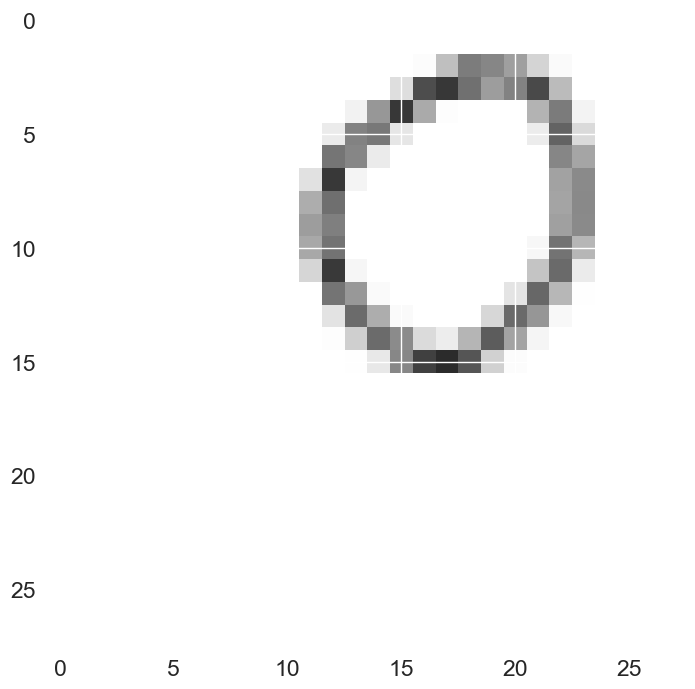

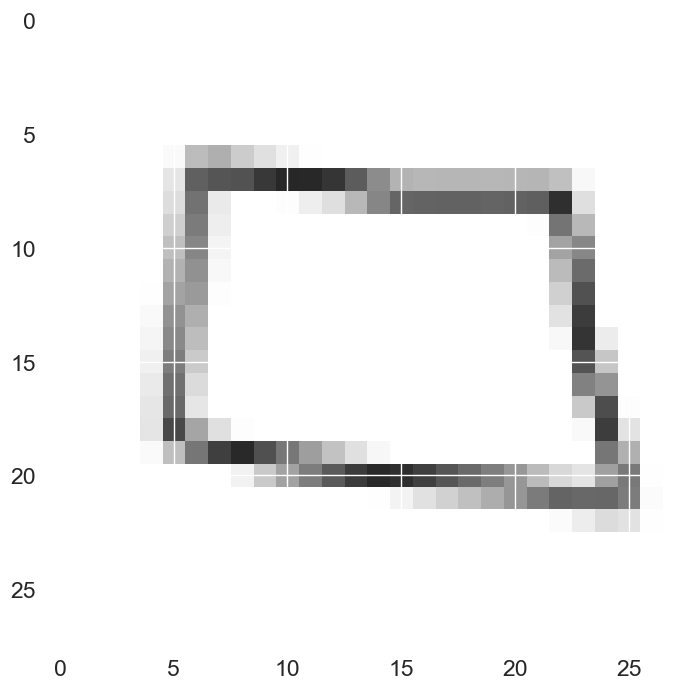

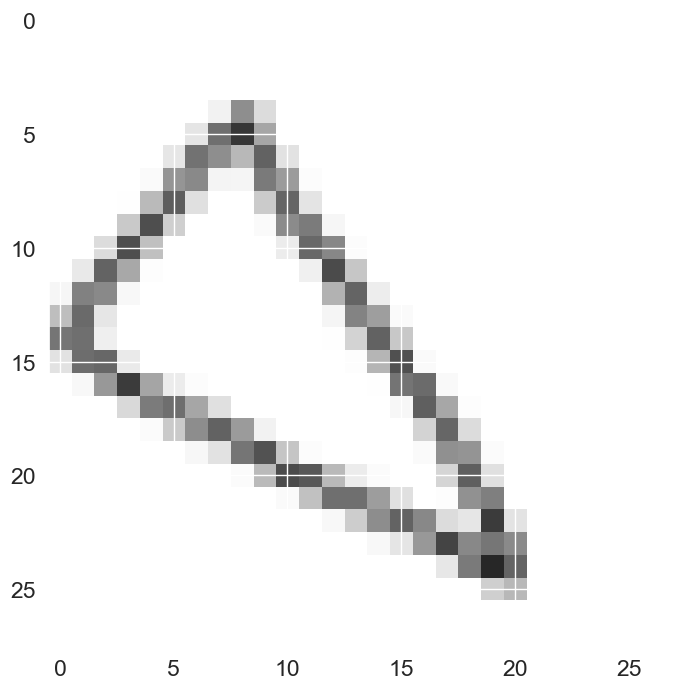

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


def plot_image(path):
    img = mpimg.imread(path)
    plt.imshow(img)
    plt.show()


plot_image(os.path.join(circles_path, os.listdir(circles_path)[0]))
plot_image(os.path.join(squares_path, os.listdir(squares_path)[0]))
plot_image(os.path.join(triangles_path, os.listdir(triangles_path)[0]))

Loading images into list, converting them to grayscale and flattening them.

In [11]:
from PIL import Image

images = []


def load_images(path):
    for image_path in os.listdir(path):
        image = Image.open(os.path.join(path, image_path)).convert('L')
        image = np.array(image).flatten()
        images.append(image)


load_images(circles_path)
load_images(squares_path)
load_images(triangles_path)

### Model building

KNeighborsClassifier()

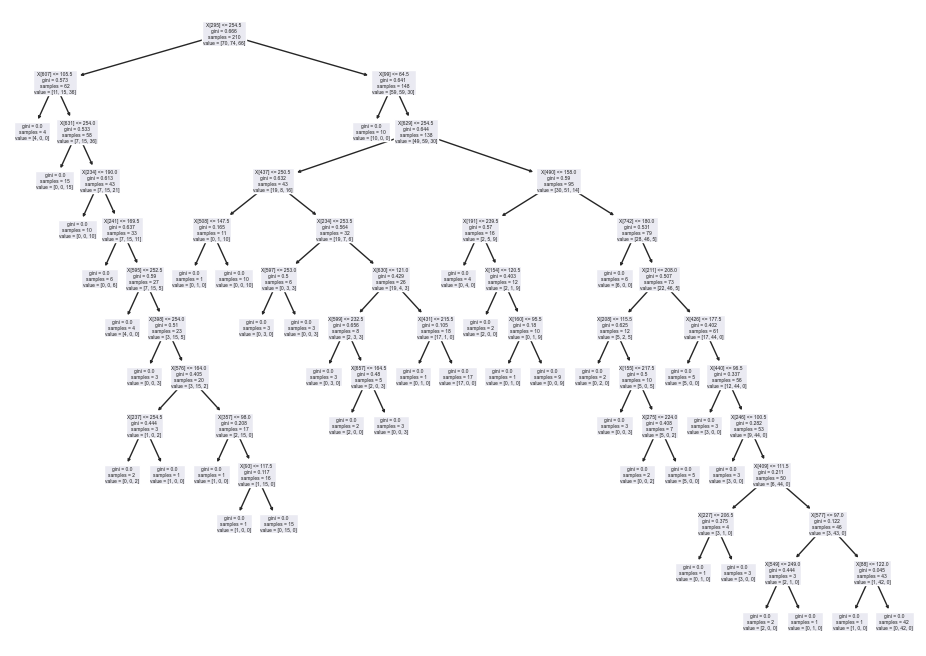

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(
    images,
    np.concatenate((circles_labels, squares_labels, triangles_labels)),
    test_size=0.3,
    random_state=4321,
    shuffle=True
)

dtc = DecisionTreeClassifier(random_state=1234)
dtc.fit(X_train, y_train)

tree.plot_tree(dtc)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

### Model evaluation

In [13]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

dtc_y_pred = dtc.predict(X_test)
knn_y_pred = knn.predict(X_test)


def print_scores(clf_name, y_test, y_pred):
    print(clf_name)
    print('Accuracy: ', accuracy_score(y_test, y_pred))
    print('F1: ', f1_score(y_test, y_pred, average='weighted'))
    print('Precision: ', precision_score(y_test, y_pred, average='weighted'))
    print('Recall: ', recall_score(y_test, y_pred, average='weighted'))
    print(""'-' * 40)


print_scores("Decision Tree", y_test, dtc_y_pred)
print_scores("KNN", y_test, knn_y_pred)

Decision Tree
Accuracy:  0.3888888888888889
F1:  0.3927909190621054
Precision:  0.4071322751322751
Recall:  0.3888888888888889
----------------------------------------
KNN
Accuracy:  0.4444444444444444
F1:  0.39545330367248177
Precision:  0.5664402608588656
Recall:  0.4444444444444444
----------------------------------------


### Comparison

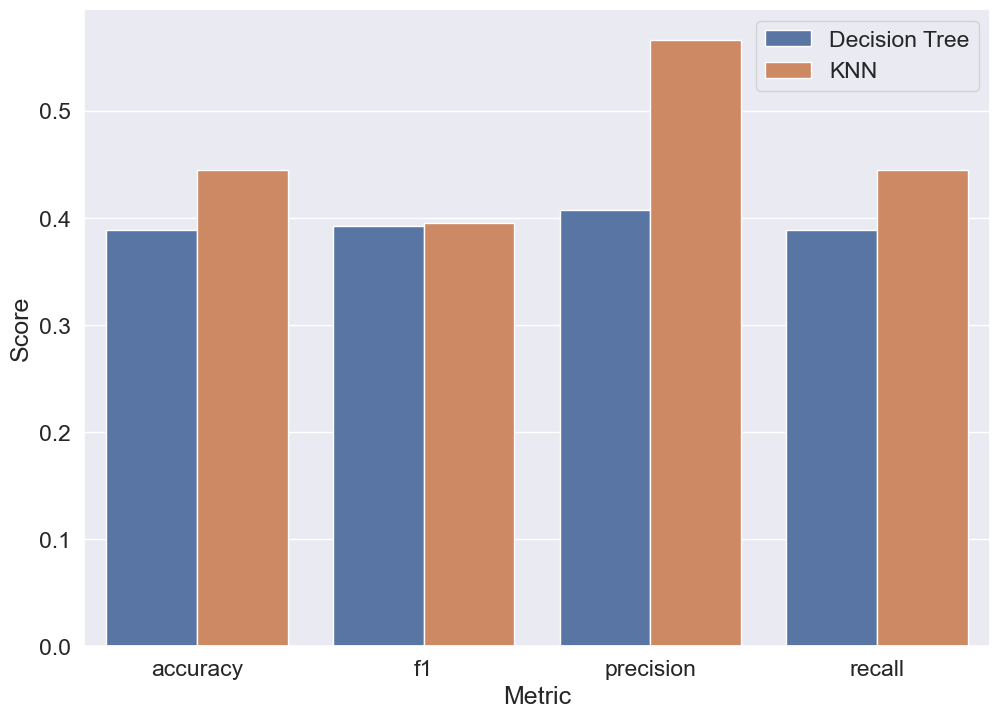

In [14]:
import seaborn as sns
import pandas as pd

sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize': (11.7, 8.27)})
sns.set(font_scale=1.5)


# Display all metric for both models on same graph
def plot_metrics(y_test, dtc_y_pred, knn_y_pred):
    metrics = ['accuracy', 'f1', 'precision', 'recall']
    
    dtc_scores = [accuracy_score(y_test, dtc_y_pred), f1_score(y_test, dtc_y_pred, average='weighted'),
                  precision_score(y_test, dtc_y_pred, average='weighted'),
                  recall_score(y_test, dtc_y_pred, average='weighted')]
    
    knn_scores = [accuracy_score(y_test, knn_y_pred), f1_score(y_test, knn_y_pred, average='weighted'),
                  precision_score(y_test, knn_y_pred, average='weighted'),
                  recall_score(y_test, knn_y_pred, average='weighted')]
    
    scores = [dtc_scores, knn_scores]
    scores_df = pd.DataFrame(scores, columns=metrics, index=['Decision Tree', 'KNN'])
    scores_df = scores_df.melt(var_name='Metric', value_name='Score', ignore_index=False)
    sns.barplot(x='Metric', y='Score', hue=scores_df.index, data=scores_df)
    plt.show()


plot_metrics(y_test, dtc_y_pred, knn_y_pred)